In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

np.random.seed(42)

In [14]:
df=pd.read_csv("chess_game_outcomes.csv")

In [15]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model training
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)



Mean Squared Error: 0.01610699478928899
R-Squared Score: 0.9117424943052658


In [16]:
def interpret_color(actual, predicted):
    if abs(actual - predicted) < 0.25:  # Close match (correct)
        return 'green'
    elif abs(actual - predicted) < 0.5:  # Slightly off
        return 'orange'
    else:  # Significant mismatch
        return 'red'

C:\Users\pc\AppData\Local\Temp\ipykernel_8976\3134771207.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(y_test, y_pred, c=colors, alpha=0.8, edgecolor='k', cmap='coolwarm')


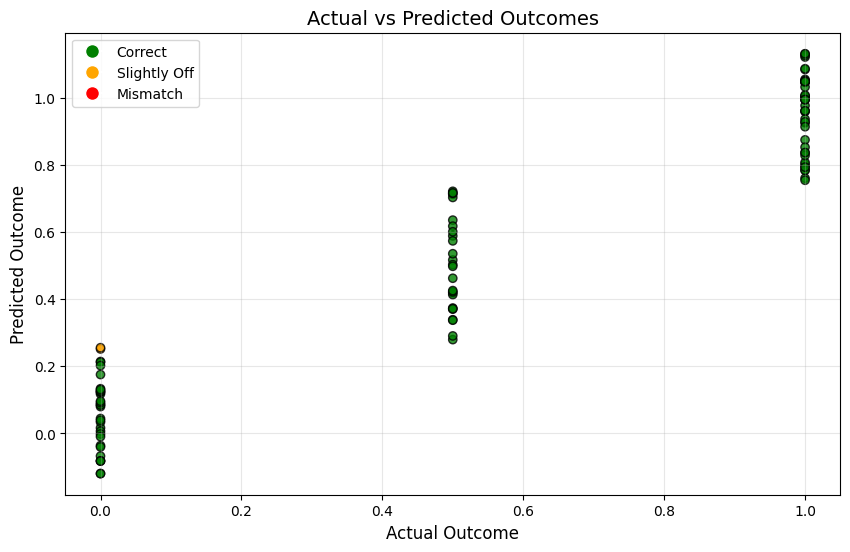

In [20]:
colors = [interpret_color(actual, predicted) for actual, predicted in zip(y_test, y_pred)]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred, c=colors, alpha=0.8, edgecolor='k', cmap='coolwarm')

plt.title("Actual vs Predicted Outcomes", fontsize=14)
plt.xlabel("Actual Outcome", fontsize=12)
plt.ylabel("Predicted Outcome", fontsize=12)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Correct'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Slightly Off'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Mismatch')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.grid(alpha=0.3)
plt.show()